In [1]:
from smc import SMCsampler
from prior import CatalogPrior
from images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

In [2]:
num_images = 1
img_dim = 15 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 3.25
background_intensity = 19200

image_attributes = ImageAttributes(img_width = img_width,
                                   img_height = img_height,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 7 
total flux
 419185.3125 
loc
 [[ 0.         0.       ]
 [10.329173   2.9791625]
 [ 3.0713937  7.956241 ]
 [ 6.1269455  4.6874714]
 [ 1.0536923  5.4416227]
 [11.218217  12.036211 ]
 [12.668237  13.753546 ]
 [ 9.506056  11.482825 ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]] 




True count: 7
True total flux: 419185.3125

Starting the sampler...
iteration 5, temperature = 0.0013073142617940903, posterior mean count = 6.399041175842285
iteration 10, temperature = 0.004854409024119377, posterior mean count = 6.558840751647949
iteration 15, temperature = 0.01125778816640377, posterior mean count = 6.611201286315918
iteration 20, temperature = 0.020348597317934036, posterior mean count = 6.607022285461426
iteration 25, temperature = 0.033356547355651855, posterior mean count = 6.614947319030762
iteration 30, temperature = 0.05421587452292442, posterior mean count = 6.640447616577148
iteration 35, temperature = 0.08932328224182129, posterior mean count = 6.649704933166504
iteration 40, temperature = 0.1599719077348709, posterior mean count = 6.663026809692383
iteration 45, temperature = 0.3073699474334717, posterior mean count = 6.6891188621521
iteration 50, temperature = 0.6001956462860107, posterior mean count = 6.7646284103393555
iteration 55, temperature = 0.96

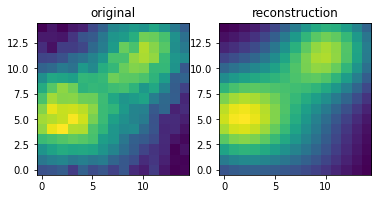

In [4]:
max_objects_smc = max_objects + 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3.)
smc = SMCsampler(images[0], image_attributes, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()